In [49]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Set the seed value
seed_value = 42

# Set random seed for TensorFlow
tf.random.set_seed(seed_value)

In [50]:
data = pd.read_excel("MarketDATA.xlsx")

In [ ]:
data.head(100)

In [52]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [53]:
# Encode the Crop column
label_encoder = LabelEncoder()
data['Crop_encoded'] = label_encoder.fit_transform(data['Crop'])

In [ ]:
data.head(100)

In [55]:
scaler = MinMaxScaler()
data[['Market_Price', 'Production_Cost','Crop_encoded']] = scaler.fit_transform(
    data[['Market_Price', 'Production_Cost','Crop_encoded']]
)

In [ ]:
data.head()

In [57]:
data1 = data.drop(columns=['Crop'])

In [ ]:
data1.head()

In [59]:
data1 = data1.sort_index()

In [ ]:
data1.head()

In [61]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(seq)
        targets.append(target)
    
    return np.array(sequences), np.array(targets)


In [ ]:
crops = data1['Crop_encoded'].unique()  # Get unique crops

all_sequences = []
all_targets = []

for crop in crops:
    crop_data = data1[data1['Crop_encoded'] == crop].drop('Crop_encoded', axis=1)
    scaled_crop_data = scaler.fit_transform(crop_data)
    
    sequences, targets = create_sequences(scaled_crop_data, sequence_length=12)  # Using 12 months as an example
    all_sequences.append(sequences)
    all_targets.append(targets)

# Convert lists to numpy arrays
X = np.concatenate(all_sequences)
y = np.concatenate(all_targets)
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


In [ ]:
y.shape

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))


In [82]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))  # Adjust output layer size based on your target
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

Epoch 1/200


/home/ghost/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1940
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0652
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0590
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0551
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0533
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0526
Epoch 7/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0522
Epoch 8/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0520
Epoch 9/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0518
Epoch 10/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0517
Epoch 11/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0515
Epoch 12/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0515
Epoch 13/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0514
Epoch 14/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0513
Epoch 15/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/ste

In [83]:
y_pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [84]:
# Inverse transform predictions and actual values
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_inv, y_pred_inv)
mse = mean_squared_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Absolute Error: 5.892504357496897
Mean Squared Error: 79.09317264374745
R-squared: 0.10743332887565134


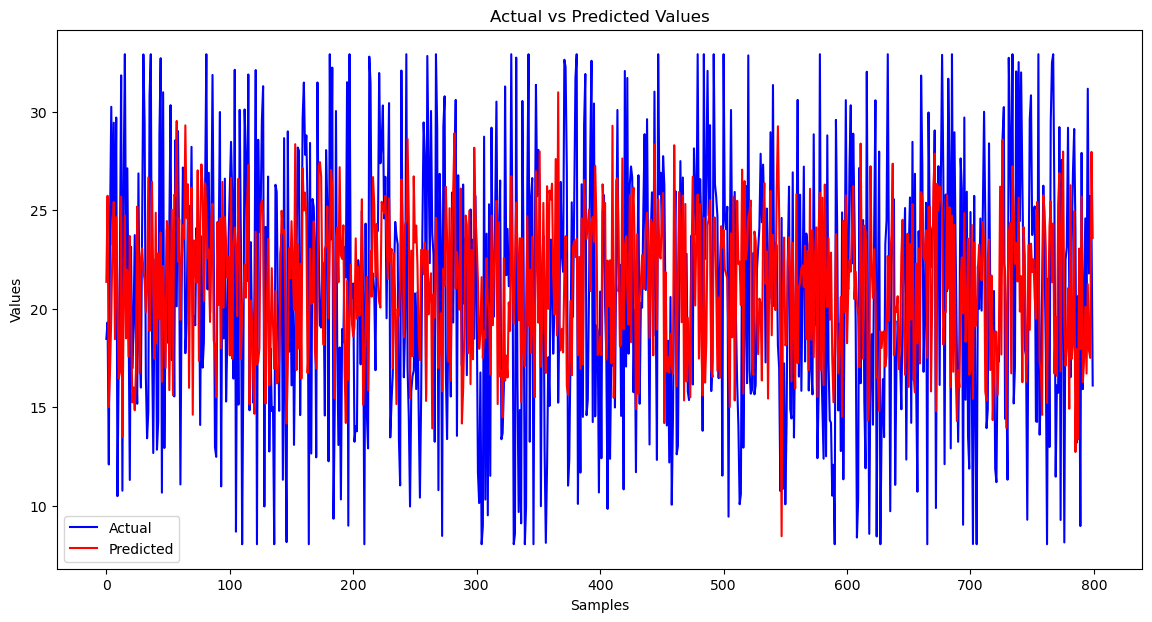

In [86]:
import matplotlib.pyplot as plt

# Plot the predictions against the actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test_inv[:, 0], label='Actual', color='blue')  # Adjust index based on your target column
plt.plot(y_pred_inv[:, 0], label='Predicted', color='red')  # Adjust index based on your target column
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()


In [87]:
data2 = pd.read_excel("MarketDATA.xlsx")


In [88]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.set_index('Date', inplace=True)
# Encode the Crop column
label_encoder = LabelEncoder()
data2['Crop_encoded'] = label_encoder.fit_transform(data2['Crop'])

In [89]:
data2.head()

,Crop,Market_Price,Production_Cost,Gross_Profit_Margin,Crop_encoded
Date,,,,,
2022-01-01,Cabbage,24.85,7.17,71.17,23
2022-02-01,Cabbage,23.90,8.37,65.00,23
2022-03-01,Cabbage,31.78,5.77,81.85,23
2022-04-01,Cabbage,22.32,7.14,68.02,23
2022-05-01,Cabbage,32.12,6.61,79.43,23


In [90]:
# Filter the dataset for Crop_encoded 23
crop_23_data = data2[data2['Crop_encoded'] == 23].drop(columns=['Crop'])

# Check if there is enough data
if len(crop_23_data) < 12:
    raise ValueError("Not enough data to create a sequence.")


In [91]:
# Get the last 12 months of data for this crop
last_12_months = crop_23_data.tail(12).drop('Crop_encoded', axis=1)


In [92]:
# Scale the last 12 months of data
scaled_last_12_months = scaler.fit_transform(last_12_months)


In [93]:
scaled_last_12_months

array([[0.97067095, 0.37737962, 0.95547143],
       [1.        , 0.30459127, 1.        ],
       [0.7842507 , 1.        , 0.52514873],
       [0.55162716, 0.63717805, 0.5729223 ],
       [0.76295701, 0.45800672, 0.8316207 ],
       [0.30574528, 0.77827548, 0.12385073],
       [0.42426677, 0.32026876, 0.71480079],
       [0.        , 0.20716685, 0.10456102],
       [0.3740458 , 0.05039194, 0.9194159 ],
       [0.35797509, 0.        , 0.95691365],
       [0.12655685, 0.26315789, 0.37461691],
       [0.21333869, 0.7043673 , 0.        ]])

In [94]:
# Reshape for LSTM input (samples, time steps, features)
input_data = scaled_last_12_months.reshape((1, scaled_last_12_months.shape[0], scaled_last_12_months.shape[1]))


In [95]:
# Make prediction
predicted_scaled = model.predict(input_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


In [96]:
# Inverse transform the predicted values
predicted_values = scaler.inverse_transform(predicted_scaled)

predicted_values

array([[24.643665, 10.652691, 56.163555]], dtype=float32)

In [97]:
# Assuming you want the prediction for the first target variable (e.g., Market Price)
predicted_value_for_first_target = predicted_values[0][2]  # Adjust index as needed
print(f'Predicted value for next month (Crop 23): {predicted_value_for_first_target}')

Predicted value for next month (Crop 23): 56.16355514526367
